In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### UnWeighted day-normalized

In [6]:
summary_df

,Regression,Equation,Station ID,Readings,First day,Last day,Total days,Gap days,DD % est,HDD base C,...,R2 adjusted,R2 cross-validated,S,CVRMSE,Baseload S,Baseload P,HDD coef S,HDD coef P,CDD coef S,CDD coef P
0,"=""1 (shortlist)""",E = b*days + h*HDD + c*CDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,17.0,...,0.696439,0.631512,94.826128,0.119377,50.837821,1.446232e-08,6.109985,3.353048e-07,8.154889,0.000005
1,"=""2""",E = b*days + h*HDD + c*CDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,15.5,...,0.679926,0.609763,97.371152,0.122581,39.845777,5.406300e-12,6.009211,9.055889e-07,14.299568,0.000013
2,"=""3""",E = b*days + h*HDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,10.0,...,0.305790,0.219767,143.400359,0.180527,36.007815,1.100000e-15,14.521183,2.992326e-03,NaN,NaN
3,"=""4""",E = b*days + h*HDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,15.5,...,0.231782,0.125259,150.850626,0.189906,41.784623,3.390000e-14,7.527161,1.002414e-02,NaN,NaN
4,"=""5""",E = b*days,LIML,24,2023-01-01,2024-12-31,731,0,0.001,NaN,...,0.000000,-24.291233,172.109499,0.216669,35.131704,0.000000e+00,NaN,NaN,NaN,NaN
5,"=""6""",E = b*days + c*CDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,NaN,...,0.035890,-0.081196,168.992782,0.212745,39.225239,1.900000e-15,NaN,NaN,64.873596,0.186851
6,"=""7""",E = b*days + c*CDD,LIML,24,2023-01-01,2024-12-31,731,0,0.001,NaN,...,0.012211,-0.106253,171.055489,0.215342,41.708124,7.300000e-15,NaN,NaN,20.310778,0.269298


In [13]:
reg_df.columns

Index(['First day', 'Last day', 'Days', 'Usage', 'Unnamed: 4', 'HDD 17 C',
       'CDD 17 C', 'Predicted', 'Diff.', '% Diff.', 'Unnamed: 10',
       'HDD 15.5 C', 'CDD 22 C', 'Predicted.1', 'Diff..1', '% Diff..1',
       'Unnamed: 16', 'HDD 10 C', 'Predicted.2', 'Diff..2', '% Diff..2',
       'Unnamed: 21', 'HDD 15.5 C.1', 'Predicted.3', 'Diff..3', '% Diff..3',
       'Unnamed: 26', 'Predicted.4', 'Diff..4', '% Diff..4', 'Unnamed: 30',
       'CDD 27 C', 'Predicted.5', 'Diff..5', '% Diff..5', 'Unnamed: 35',
       'CDD 22 C.1', 'Predicted.6', 'Diff..6', '% Diff..6'],
      dtype='object')

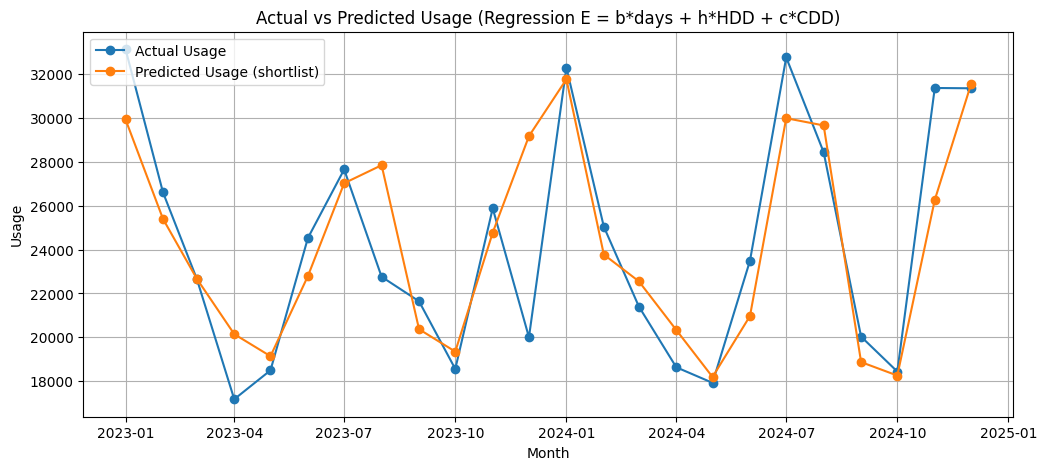

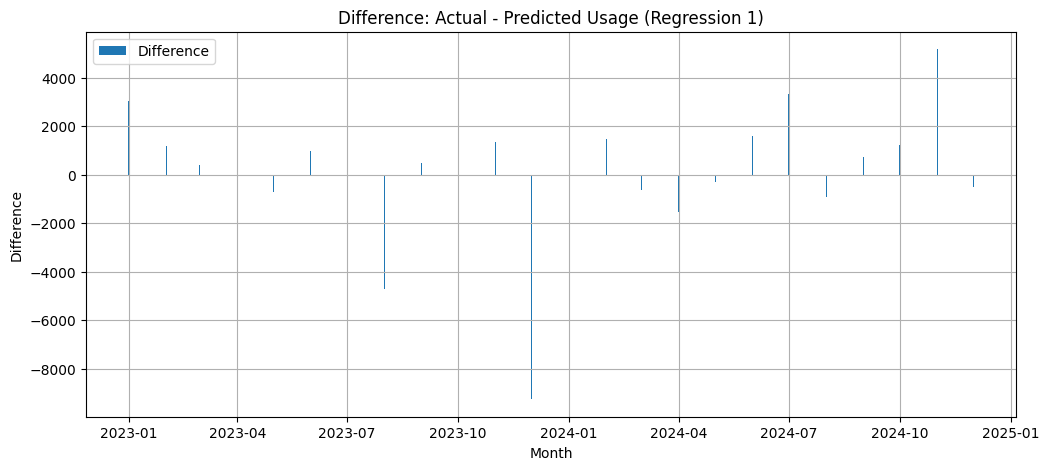

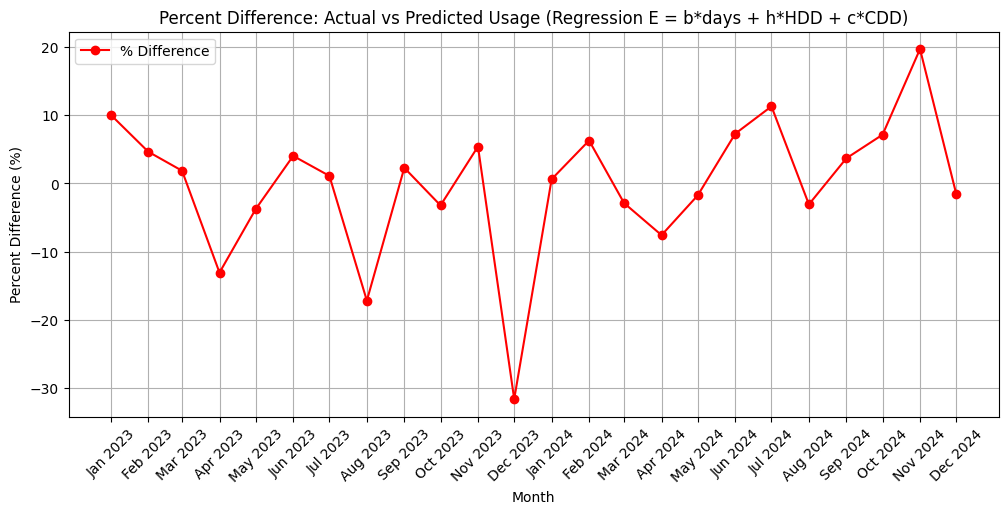

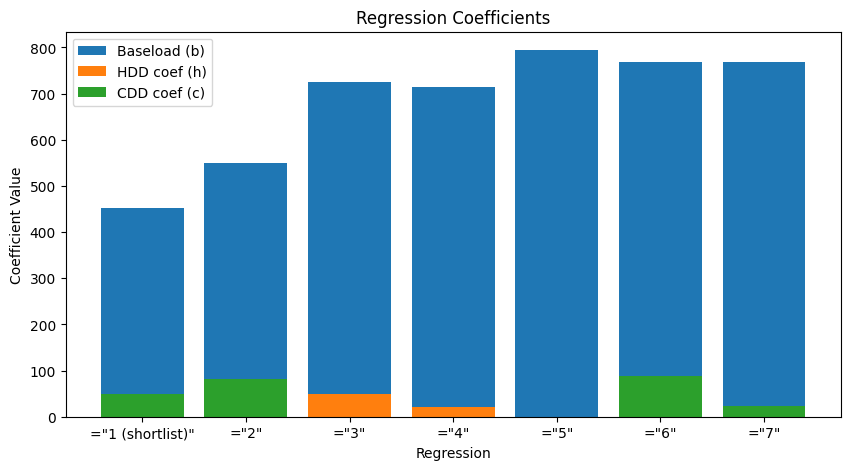

In [17]:
# Load the regression summary (first table, first 7 rows)
summary_df = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_unweighted.csv', nrows=7)
summary_df.columns = summary_df.columns.str.strip()

# Load the monthly results (second table, skip first 8 rows)
reg_df = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_unweighted.csv', skiprows=15)
reg_df.columns = reg_df.columns.str.strip()

# Parse dates
reg_df['First day'] = pd.to_datetime(reg_df['First day'], errors='coerce')
reg_df['Last day'] = pd.to_datetime(reg_df['Last day'], errors='coerce')

# Remove rows where 'First day' is NaT (not a data row)
reg_df = reg_df[reg_df['First day'].notna()]

# Plot actual vs predicted usage for "1 (shortlist)"
plt.figure(figsize=(12, 5))
plt.plot(reg_df['First day'], reg_df['Usage'], marker='o', label='Actual Usage')
plt.plot(reg_df['First day'], reg_df['Predicted.1'], marker='o', label='Predicted Usage (shortlist)')
plt.title('Actual vs Predicted Usage (Regression E = b*days + h*HDD + c*CDD)')
plt.xlabel('Month')
plt.ylabel('Usage')
plt.legend()
plt.grid(True)
plt.show()

# Plot difference and percent difference
plt.figure(figsize=(12, 5))
plt.bar(reg_df['First day'], reg_df['Diff.'], label='Difference')
plt.title('Difference: Actual - Predicted Usage (Regression 1)')
plt.xlabel('Month')
plt.ylabel('Difference')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(reg_df['First day'], reg_df['% Diff.'].str.rstrip('%').astype(float), marker='o', color='red', label='% Difference')
plt.title('Percent Difference: Actual vs Predicted Usage (Regression E = b*days + h*HDD + c*CDD)')
plt.xlabel('Month')
plt.ylabel('Percent Difference (%)')
plt.xticks(
    reg_df['First day'],   # put one tick for each data point
    reg_df['First day'].dt.strftime('%b %Y'),  # nice month-year labels
    rotation=45            # tilt to avoid overlap
)
plt.grid(True)
plt.legend()
plt.show()

# Plot coefficients for each regression model (from the summary table)
plt.figure(figsize=(10, 5))
plt.bar(summary_df['Regression'], summary_df['Baseload (b)'], label='Baseload (b)')
plt.bar(summary_df['Regression'], summary_df['HDD coef (h)'], label='HDD coef (h)')
plt.bar(summary_df['Regression'], summary_df['CDD coef (c)'], label='CDD coef (c)')
plt.title('Regression Coefficients')
plt.xlabel('Regression')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

In [3]:
reg_df

,First day,Last day,Days,Usage,Unnamed: 4,HDD 13 C,CDD 12.5 C,Predicted,Diff.,% Diff.,...,Unnamed: 36,CDD 0 C,Predicted.6,Diff..6,% Diff..6,Unnamed: 41,CDD 22 C.1,Predicted.7,Diff..7,% Diff..7
0,2023-01-01,2023-01-31,31,7316,NaN,236.6,0.6,9087.398646,-1771.398646,-19.49291227361861%,...,NaN,169.6,7310.301487,5.698513,0.07795182482280354%,NaN,0.0,5583.844988,1732.155012,31.020829115062014%
1,2023-02-01,2023-02-28,28,5690,NaN,179.0,8.8,7154.992440,-1464.992440,-20.47510815116279%,...,NaN,196.0,6317.484661,-627.484661,-9.932507872245958%,NaN,0.0,5043.472893,646.527107,12.81908560301193%
2,2023-03-01,2023-03-31,31,3686,NaN,79.2,36.2,4296.329485,-610.329485,-14.205835167090285%,...,NaN,353.5,6084.520814,-2398.520814,-39.42004452170295%,NaN,0.0,5583.844988,-1897.844988,-33.98813885755623%
3,2023-04-01,2023-04-30,30,2464,NaN,45.6,72.4,3460.875510,-996.875510,-28.804142397765414%,...,NaN,408.7,5444.303877,-2980.303877,-54.741688642703664%,NaN,0.3,5401.210215,-2937.210215,-54.38059431324872%
4,2023-05-01,2023-05-31,31,2821,NaN,1.6,182.5,2986.951111,-165.951111,-5.555869672626395%,...,NaN,569.0,4648.111162,-1827.111162,-39.308680410277255%,NaN,18.3,5430.689773,-2609.689773,-48.05448077272198%
5,2023-06-01,2023-06-30,30,4252,NaN,0.0,335.6,4140.510805,111.489195,2.692643510197184%,...,NaN,710.6,3431.997270,820.002730,23.89287245912097%,NaN,78.3,4748.417493,-496.417493,-10.454377562460953%
6,2023-07-01,2023-07-31,31,5059,NaN,0.0,407.3,4773.295834,285.704166,5.9854694859272435%,...,NaN,794.8,3143.047127,1915.952873,60.95845195192576%,NaN,124.0,4546.071943,512.928057,11.28288473377183%
7,2023-08-01,2023-08-31,31,3874,NaN,0.0,407.9,4778.201543,-904.201543,-18.92347016188095%,...,NaN,795.4,3139.047843,734.952157,23.41321936043562%,NaN,134.2,4460.706741,-586.706741,-13.152775440557818%
8,2023-09-01,2023-09-30,30,3843,NaN,0.9,271.6,3646.294439,196.705561,5.394670241565864%,...,NaN,646.1,3861.920344,-18.920344,-0.48992061985826424%,NaN,46.1,5017.903719,-1174.903719,-23.41423401068552%
9,2023-10-01,2023-10-31,31,3346,NaN,4.4,158.4,2880.311713,465.688287,16.16798228639988%,...,NaN,543.2,4820.080391,-1474.080391,-30.582070665551093%,NaN,16.1,5449.101875,-2103.101875,-38.59538550123828%


In [8]:
# Print model evaluation metrics for each regression in the summary table
for idx, row in summary_df.iterrows():
    r2 = row['R2']
    nmbe = row['Baseload S']
    cvrmse = row['CVRMSE'] * 100  # Convert to percent if not already
    print(f"Model {row['Equation']} Evaluation Metrics")
    print(f'CDD Base Temperature:{row['CDD base C']}, HDD Base Temperature:{row['HDD base C']}')
    print(f"R²:      {r2:.3f}")
    print(f"NMBE:    {nmbe:.2f}% (target: |≤5% monthly|)")
    print(f"CV(RMSE):{cvrmse:.2f}% (target: ≤15% monthly)")
    print('-'*40)

Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:12.5, HDD Base Temperature:13.0
R²:      0.702
NMBE:    29.27% (target: |≤5% monthly|)
CV(RMSE):30.87% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:13.0, HDD Base Temperature:13.0
R²:      0.701
NMBE:    28.34% (target: |≤5% monthly|)
CV(RMSE):30.87% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD Evaluation Metrics
CDD Base Temperature:nan, HDD Base Temperature:10.0
R²:      0.635
NMBE:    14.27% (target: |≤5% monthly|)
CV(RMSE):33.37% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:22.0, HDD Base Temperature:15.5
R²:      0.672
NMBE:    22.54% (target: |≤5% monthly|)
CV(RMSE):32.37% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD Evaluation Metrics
CDD B

### Unweighted day-normalized

In [3]:
summary_df = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_met18_unweighted.csv', nrows=7)
summary_df.columns = summary_df.columns.str.strip()

# Print model evaluation metrics for each regression in the summary table
for idx, row in summary_df.iterrows():
    r2 = row['R2']
    nmbe = row['Baseload S']
    cvrmse = row['CVRMSE'] * 100  # Convert to percent if not already
    print(f"Model {row['Equation']} Evaluation Metrics")
    print(f'CDD Base Temperature:{row['CDD base C']}, HDD Base Temperature:{row['HDD base C']}')
    print(f"R²:      {r2:.3f}")
    print(f"NMBE:    {nmbe:.2f}% (target: |≤5% monthly|)")
    print(f"CV(RMSE):{cvrmse:.2f}% (target: ≤15% monthly)")
    print('-'*40)

Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:12.5, HDD Base Temperature:13.0
R²:      0.701
NMBE:    29.23% (target: |≤5% monthly|)
CV(RMSE):30.74% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:13.5, HDD Base Temperature:13.0
R²:      0.701
NMBE:    27.46% (target: |≤5% monthly|)
CV(RMSE):30.74% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD Evaluation Metrics
CDD Base Temperature:nan, HDD Base Temperature:10.0
R²:      0.633
NMBE:    14.23% (target: |≤5% monthly|)
CV(RMSE):33.24% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:22.0, HDD Base Temperature:15.5
R²:      0.671
NMBE:    22.49% (target: |≤5% monthly|)
CV(RMSE):32.24% (target: ≤15% monthly)
----------------------------------------
Model E = b*days + h*HDD Evaluation Metrics
CDD B

### No normalization

In [5]:
summary_df = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_met18_nonormalization.csv', nrows=7)
summary_df.columns = summary_df.columns.str.strip()

# Print model evaluation metrics for each regression in the summary table
for idx, row in summary_df.iterrows():
    r2 = row['R2']
    nmbe = row['Baseload S']
    cvrmse = row['CVRMSE'] * 100  # Convert to percent if not already
    print(f"Model {row['Equation']} Evaluation Metrics")
    print(f'CDD Base Temperature:{row['CDD base C']}, HDD Base Temperature:{row['HDD base C']}')
    print(f"R²:      {r2:.3f}")
    print(f"NMBE:    {nmbe:.2f}% (target: |≤5% monthly|)")
    print(f"CV(RMSE):{cvrmse:.2f}% (target: ≤15% monthly)")
    print('-'*40)

Model E = b + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:11.0, HDD Base Temperature:13.5
R²:      0.703
NMBE:    1009.95% (target: |≤5% monthly|)
CV(RMSE):31.16% (target: ≤15% monthly)
----------------------------------------
Model E = b + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:13.0, HDD Base Temperature:13.0
R²:      0.702
NMBE:    860.26% (target: |≤5% monthly|)
CV(RMSE):31.19% (target: ≤15% monthly)
----------------------------------------
Model E = b + h*HDD Evaluation Metrics
CDD Base Temperature:nan, HDD Base Temperature:10.0
R²:      0.630
NMBE:    441.89% (target: |≤5% monthly|)
CV(RMSE):33.96% (target: ≤15% monthly)
----------------------------------------
Model E = b + h*HDD + c*CDD Evaluation Metrics
CDD Base Temperature:22.0, HDD Base Temperature:15.5
R²:      0.672
NMBE:    689.31% (target: |≤5% monthly|)
CV(RMSE):32.74% (target: ≤15% monthly)
----------------------------------------
Model E = b + h*HDD Evaluation Metrics
CDD Base Temperature:nan,